# Postprocessing Stretch Test

In [26]:
import sys
sys.path.append('..') 

import pandas as pd
import time
import matplotlib.pyplot as plt
import re
from pandas import ExcelWriter
from datetime import datetime
import os
from functools import reduce 
import numpy as np
import xlrd
from os import devnull

import utils
import warnings

# Suppress warnings
warnings.filterwarnings("ignore")


#os.chdir(r"C:\Users\Desi\Desktop\TesiStanford\keithley_results\121323-d1114-1-w-tempstab")
os.chdir(r"C:\Users\Desi\Desktop\TesiStanford\data_to_analyze\finalokdevice")
path =  os.getcwd()

In [3]:
def create_folder(device_name,type_of_test,additional_comment= None):
    """
    create a new folder of the type mmddyyyy-devicename-type_of_test
    return path of the folder
    """
    today = datetime.now()
    if additional_comment:
        os.mkdir(today.strftime('%m%d%Y')+'-'+device_name+'-'+type_of_test+'-'+additional_comment)
        return today.strftime('%m%d%Y')+'-'+device_name+'-'+type_of_test+'-'+additional_comment
    else:
        os.mkdir(today.strftime('%m%d%Y')+'-'+device_name+'-'+type_of_test)
        return today.strftime('%m%d%Y')+'-'+device_name+'-'+type_of_test

In [4]:
col_L = '#1E5986'
col_R = '#BF8F00'
col_diff = "#FF8080"

In [27]:
# reading files and saving them in the dictionary df
df = {}
strain = ['0','25','50','75','100']
for st in strain: df[st] = [pd.read_excel(xlrd.open_workbook(str(os.getcwd())+'\\'+excelfile, logfile=open(devnull, 'w')),engine='xlrd') for excelfile in os.listdir(str(os.getcwd())) if excelfile.endswith('-'+st+'%.xls')]

### Computing the max values of the Right and Left curves, their mean and std for all the orientations

In [28]:
max_values = [[[i['DrainVLeft'].max(),i['DrainVRight'].max()] for i in df[st]] for st in strain]
mean = [np.mean(max_values[i],0) for i in range(len(strain))]
std = [np.std(max_values[i],0) for i in range(len(strain))]
std_diff = [np.std(np.array([max_values[i][j][0] for j in range(len(max_values[i]))])-np.array([max_values[i][j][1] for j in range(len(max_values[i]))])) for i in range(len(strain))]

### plotting all the orientations together


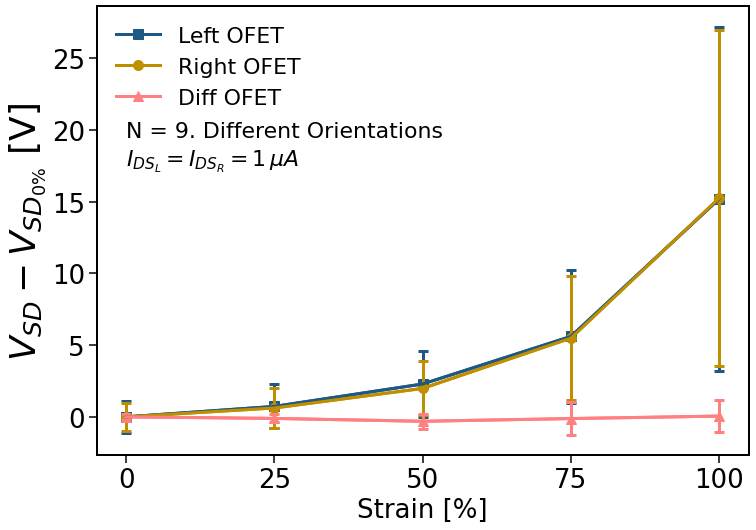

In [88]:
mean_L = np.array([i[0] for i in mean])
mean_L = mean_L- mean_L[0]
mean_R = np.array([i[1] for i in mean])
mean_R = mean_R- mean_R[0]

fig, ax1 = plt.subplots(figsize=(11.69, 8.26)) # dimension in inch

plt.plot(strain,mean_L,label = 'Left OFET', color = col_L, linewidth = 3, marker = 's', markersize= 10) 
plt.errorbar(strain,mean_L, yerr = [i[0] for i in std], color = col_L, linewidth = 3,capsize=5, capthick = 3)

plt.plot(strain,mean_R,label = 'Right OFET', color = col_R, linewidth = 3, marker = 'o',markersize= 10)
plt.errorbar(strain,mean_R, yerr = [i[1] for i in std], color = col_R, linewidth = 3,capsize=5, capthick = 3)

plt.plot(strain,np.array(mean_R)-np.array(mean_L), label = 'Diff OFET', color = col_diff, linewidth = 3, marker = '^', markersize= 10)
plt.errorbar(strain,np.array(mean_R)-np.array(mean_L), yerr = std_diff, color = col_diff, linewidth = 3,capsize=5, capthick = 3)

ax1.spines['bottom'].set_linewidth(2) # width of the margins 
ax1.spines['top'].set_linewidth(2)
ax1.spines['left'].set_linewidth(2)
ax1.spines['right'].set_linewidth(2)

ax1.text(0, 19.5, 'N = 9. Different Orientations', fontsize = 22) # text to add
ax1.text(0, 17.5, '$I_{DS_L} = I_{DS_R} = 1 \, \mu A$', fontsize = 22)

ax1.tick_params(axis='y', width=1.5, length=8, labelsize=26) # label settings
ax1.tick_params(axis='x', width=1.5, length=8, labelsize=26)

plt.legend(loc = 2,fontsize=22, frameon=False) #legend

plt.ylabel('$V_{SD}-V_{SD_{0\%}}$ [V]', fontsize = 36) # text label
plt.xlabel('Strain [%]', fontsize = 26)
#plt.title('Mean of values @ 1uA, different orientations, N = 9', fontsize = 15)
plt.savefig(r'C:\Users\Desi\Desktop\TesiStanford\ImagesThesis\stretchalltogether.jpeg', dpi = 1500) # path where to store the image

In [33]:
print('Mean +- std @100%:', [round((np.array(mean_R)-np.array(mean_L))[4],3), round(std_diff[4],3)],' V'  )

Mean +- std @100%: [0.053, 1.101]  V


In [32]:
print('Mean +- std @50%:', [round((np.array(mean_R)-np.array(mean_L))[2],3), round(std_diff[2],3)],' V'  )

Mean +- std @50%: [-0.308, 0.505]  V


In [59]:
os.chdir(r"C:\Users\Desi\Desktop\TesiStanford\data_to_analyze\finalokdevice")
path =  os.getcwd()
df_r = {}
row = ['1','2','3']
strain = ['0','25','50','75','100']
for r in row: 
    df_r[r] = {}
    for st in strain: df_r[r][st] = [pd.read_excel(xlrd.open_workbook(str(os.getcwd())+'\\'+excelfile, logfile=open(devnull, 'w')),engine='xlrd')  for excelfile in os.listdir(str(os.getcwd())) if excelfile.endswith('-'+st+'%.xls') and 'r'+r in excelfile]

### Computing the max values of the Right and Left curves, their mean and std for each row

In [60]:
max_values_r = {}
mean_r = {}
std_r = {}
std_diff_r = {}
for r in row:
    max_values_r[r] = [[[i['DrainVLeft'].max(),i['DrainVRight'].max()] for i in df_r[r][st]] for st in strain]
    mean_r[r] = [np.mean(max_values_r[r][i],0) for i in range(len(strain))]
    std_r[r] = [np.std(max_values_r[r][i],0) for i in range(len(strain))]
    std_diff_r[r] = [np.std(np.array([max_values_r[r][i][j][0] for j in range(len(max_values_r[r][i]))])-np.array([max_values_r[r][i][j][1] for j in range(len(max_values_r[r][i]))])) for i in range(len(strain))]

### plotting the DeltaV as a function of the strain for each row (orientation)

Mean +- std @25%: for row  1 [-0.259, 0.394]  V
Mean +- std @25%: for row  2 [0.002, 0.137]  V
Mean +- std @25%: for row  3 [-0.044, 0.125]  V


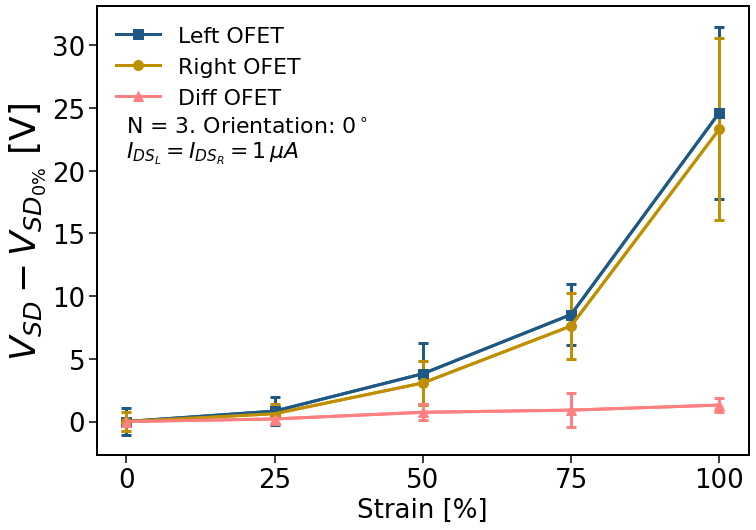

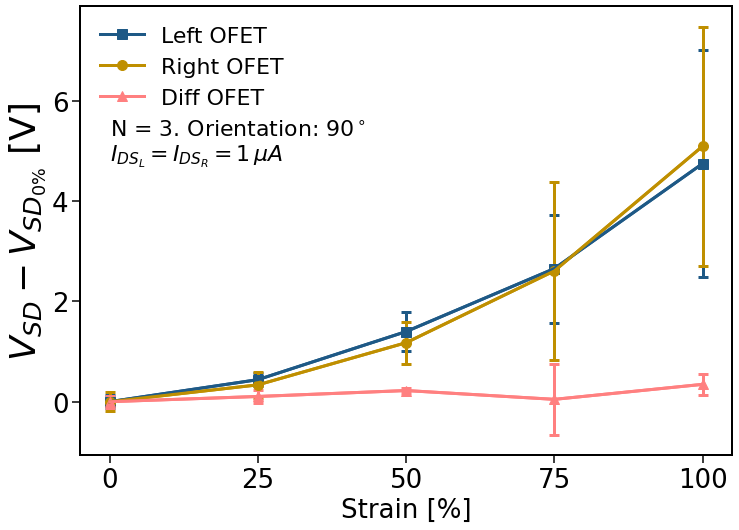

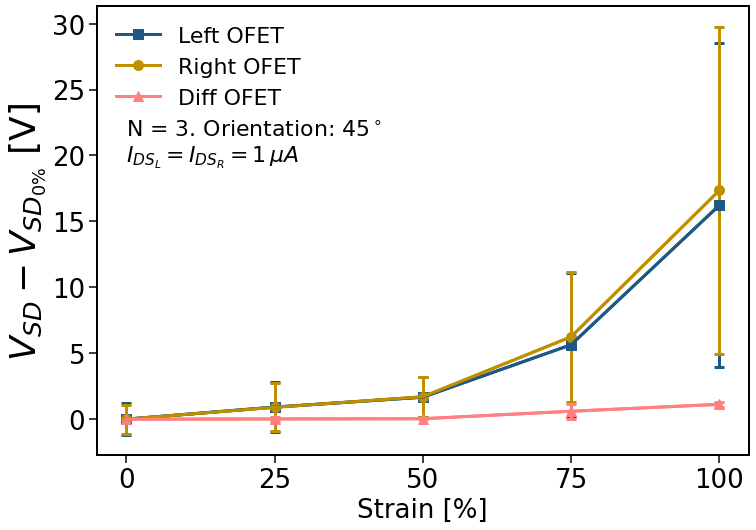

In [89]:
df_rows = {}
mean_L_r = {}
mean_R_r = {}
N = ['3','3', '3','3']
incl = ['0', '90', '45', '135']
text = [23,5.3,21.5]
text_2 = [2,0.5,2]
for r in row[:3]:
    mean_L_r[r] = np.array([i[0] for i in mean_r[r] if not np.isnan(i).all()])
    mean_R_r[r] = np.array([i[1] for i in mean_r[r] if not np.isnan(i).all()])
    data = [mean_L_r[r]-mean_L_r[r][0], [i[0] for i in std_r[r] if not np.isnan(i).all()],mean_R_r[r]-mean_R_r[r][0], [i[1] for i in std_r[r] if not np.isnan(i).all()],  np.abs(np.array(mean_R_r[r]-mean_R_r[r][0])-np.array(mean_L_r[r]-mean_L_r[r][0])), np.array(std_diff_r[r])[~np.isnan(np.array(std_diff_r[r]))]]
    df_rows[r] = pd.DataFrame(data).transpose().rename(columns = {0: 'Mean_L [V]', 1: 'std_L [V]', 2: 'Mean_R [V]', 3: 'std_R [V]', 4: 'Diff |Vl-VR| [V]', 5: 'std diff [V]'})

    fig, ax1 = plt.subplots(figsize=(11.69, 8.26)) # dimension image
    
    # errorbars (left, right, diff) in order
    plt.errorbar(strain[:len(mean_L_r[r])],mean_L_r[r]-mean_L_r[r][0], yerr = [i[0] for i in std_r[r] if not np.isnan(i).all()], color = col_L, linewidth = 3,capsize=5, capthick = 3)
    plt.errorbar(strain[:len(mean_L_r[r])],mean_R_r[r]-mean_R_r[r][0], yerr = [i[1] for i in std_r[r] if not np.isnan(i).all()], color = col_R, linewidth = 3,capsize=5, capthick = 3)
    plt.errorbar(strain[:len(mean_L_r[r])],np.abs(np.array(mean_R_r[r]-mean_R_r[r][0])-np.array(mean_L_r[r]-mean_L_r[r][0])), yerr = np.array(std_diff_r[r])[~np.isnan(np.array(std_diff_r[r]))], color = col_diff, linewidth = 3,capsize=5, capthick = 3)
    
    # plots (left, right, diff) in order
    plt.plot(strain[:len(mean_L_r[r])],mean_L_r[r]-mean_L_r[r][0],label = 'Left OFET', color = col_L, linewidth = 3, marker = 's', markersize= 10)
    plt.plot(strain[:len(mean_L_r[r])],mean_R_r[r]-mean_R_r[r][0],label = 'Right OFET', color = col_R, linewidth = 3, marker = 'o', markersize= 10)
    plt.plot(strain[:len(mean_L_r[r])],np.abs(np.array(mean_R_r[r]-mean_R_r[r][0])-np.array(mean_L_r[r]-mean_L_r[r][0])), label = 'Diff OFET', color = col_diff, linewidth = 3, marker = '^', markersize= 10)
    
    plt.legend(loc = 'upper left',  fontsize=22, frameon=False) # legend
    ax1.text(0, text[int(r)-1], 'N = 3. Orientation: '+incl[int(r)-1]+'$^\circ$', fontsize = 22) # text to add
    ax1.text(0, text[int(r)-1]-text_2[int(r)-1], '$I_{DS_L} = I_{DS_R} = 1 \, \mu A$', fontsize = 22)
    #plt.grid()
    
    ax1.spines['bottom'].set_linewidth(2) # thickness margins
    ax1.spines['top'].set_linewidth(2)
    ax1.spines['left'].set_linewidth(2)
    ax1.spines['right'].set_linewidth(2)

    ax1.tick_params(axis='y', width=1.5, length=8, labelsize=26) 
    ax1.tick_params(axis='x', width=1.5, length=8, labelsize=26)
    
    plt.ylabel('$V_{SD}-V_{SD_{0\%}}$ [V]', fontsize = 36) # labels text
    plt.xlabel('Strain [%]', fontsize = 26)

    #plt.title('Mean of values @ 1uA, row: '+r+', angle = ' + incl[int(r)-1]+'°, N = '+ N[int(r)-1],fontsize = 15)
    plt.savefig(r'C:\Users\Desi\Desktop\TesiStanford\ImagesThesis\stretchallthreeplots'+r+'.jpeg', dpi = 1200) # path where to store the image
 
    print('Mean +- std @25%: for row ',r, [round((np.array(mean_R_r[r])-np.array(mean_L_r[r]))[1],3), round(std_diff_r[r][1],3)],' V'  )

In [41]:
table_row_diff = pd.DataFrame()
orientation = ['0°','45°','90°']
for i,r in enumerate(['1','3','2']):
    print('Mean +- std @25%: for row ',r, [round((np.array(mean_R_r[r])-np.array(mean_L_r[r]))[4],3), round(std_diff_r[r][4],3)],' V'  )
    table_row_diff[orientation[i] + ': mean [V]'] = (np.array(mean_R_r[r])-np.array(mean_L_r[r]))
    table_row_diff[orientation[i] + ': std [V]'] = std_diff_r[r]
    

Mean +- std @25%: for row  1 [-1.366, 0.545]  V
Mean +- std @25%: for row  3 [1.1, 0.18]  V
Mean +- std @25%: for row  2 [0.451, 0.206]  V


In [42]:
st = {
    0: '0% strain',
    1: '25% strain',
    2: '50% strain',
    3: '75% strain',
    4: '100% strain'
}
table_row_diff = table_row_diff.rename(index=st)
table_row_diff

,0°: mean [V],0°: std [V],45°: mean [V],45°: std [V],90°: mean [V],90°: std [V]
0% strain,-0.053708,0.285163,-0.026947,0.109576,0.105534,0.116966
25% strain,-0.259038,0.393853,-0.044238,0.125138,0.001763,0.137426
50% strain,-0.790771,0.624095,0.008246,0.042890,-0.116397,0.052326
75% strain,-0.963204,1.359092,0.574111,0.560537,0.059032,0.708400
100% strain,-1.366032,0.544828,1.099653,0.179718,0.451093,0.206370


In [43]:
nomi_colonne = table_row_diff.columns.tolist()

# Dividi i nomi delle colonne in base ai delimitatori
nomi_suddivisi = [nome.split(': ') for nome in nomi_colonne]

# Estrai orientazioni e statistiche
orientazioni = [nome[0] for nome in nomi_suddivisi]
statistiche = [nome[1].split(' [')[0] for nome in nomi_suddivisi]

# Crea il MultiIndex
multi_indice = pd.MultiIndex.from_arrays([orientazioni, statistiche], names=['Orientation', 'Statistic [mV]'])

# Assegna il MultiIndex alle colonne del DataFrame
table_row_diff.columns = multi_indice

In [44]:
table_row_diff = table_row_diff.round(2)

In [45]:
styles = {
    ('0°', 'mean'): [{'selector': '', 'props': [('background-color', 'rgba(30, 89, 134, 0.15)')]}],
    ('0°', 'std'): [{'selector': '', 'props': [('background-color', 'rgba(30, 89, 134, 0.15)')]}],
    ('45°', 'mean'): [{'selector': '', 'props': [('background-color', ' rgba(191, 143, 0, 0.15)')]}],
    ('45°', 'std'): [{'selector': '', 'props': [('background-color', ' rgba(191, 143, 0, 0.15)')]}],
    ('90°', 'mean'): [{'selector': '', 'props': [('background-color', 'rgba(184, 131, 212, 0.15)')]}],
    ('90°', 'std'): [{'selector': '', 'props': [('background-color', 'rgba(196, 165, 222, 0.15)')]}]
}

styled_df = table_row_diff.style.set_table_styles(styles)

# Applica stili agli indici
styled_df = styled_df.set_properties(**{'background-color': 'rgba(200, 200, 200, 0.3)'})

styled_df.set_properties(**{'text-align': 'center'})
pd.set_option('colheader_justify', 'center')


In [46]:
styled_df = styled_df.format("{:.2f}")
styled_df

In [44]:
import dataframe_image as dfi

dfi.export(styled_df, r'C:\Users\Desi\Desktop\TesiStanford\ImagesThesis\df_styled.png')

In [ ]:
utils.save_table_xlsx(table_row_diff, 'STrain_insensitivity', 'StretchTestAllRows')

In [ ]:
# saving data for row2 in xlsx format
data = [mean_L, [i[0]*1000 for i in std],mean_R, [i[1]*1000 for i in std],  np.abs(np.array(mean_R)-np.array(mean_L)), std_diff]
#utils.save_table_xlsx(data, 'STrain_insensitivity', 'StretchTestAllRows')

In [ ]:
table = pd.DataFrame(data).transpose().rename(columns = {0: 'Mean_L [mV]', 1: 'std_L [mV]', 2: 'Mean_R [mV]', 3: 'std_R [mV]', 4: 'Diff |Vl-VR| [mV]', 5: 'std diff [mV]'})
table

In [ ]:
# saving data in an excel file with more sheets
writer = ExcelWriter(r"C:\Users\Desi\Desktop\TesiStanford\images-results\StretchTestDifferentRows.xlsx")
for key in df_rows.keys():
    df_rows[key].to_excel(writer, sheet_name="row #" + str(key))
writer.save()

## Poking experiment

In [48]:
os.chdir(r"C:\Users\Desi\Desktop\TesiStanford\data_to_analyze\poke")
path =  os.getcwd()

df_poke = {}
strain = ['0','1','2']
print(os.listdir(str(os.getcwd())))

df_poke = [pd.read_excel(xlrd.open_workbook(str(os.getcwd())+'\\'+excelfile, logfile=open(devnull, 'w')),engine='xlrd') for excelfile in os.listdir(str(os.getcwd())) if excelfile.endswith('.xls')]

['d120423-3-r1c3-poke-1.bmp', 'd120423-3-r1c3-poke-1.xls', 'd120423-3-r1c3-poke-2.bmp', 'd120423-3-r1c3-poke-2.xls', 'd120423-3-r1c3-poke-flat.bmp', 'd120423-3-r1c3-poke-flat.xls']


In [49]:
max_values_r = {}
mean_r = {}
std_r = {}
std_diff_r = {}

max_values_r = [[i['DrainVLeft'].iloc[80],i['DrainVRight'].iloc[80]] for i in df_poke] 
#std_diff_r = [np.std(np.array([max_values_r[r][i][j][0] for j in range(len(max_values_r[r][i]))])-np.array([max_values_r[r][i][j][1] for j in range(len(max_values_r[r][i]))]))*1000 for i in range(len(strain))]

Text(0.5, 1.0, 'Mean of values @ 1uA, different orientations, N = 10')

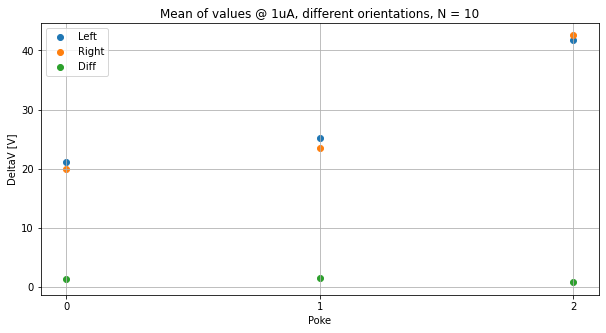

In [55]:
max_values = [max_values_r[2],max_values_r[0], max_values_r[1]]
mean_L = np.array([i[0] for i in max_values])
mean_R = np.array([i[1] for i in max_values]) 

fig, ax1 = plt.subplots(figsize=(10, 5))
plt.scatter(strain,mean_L,label = 'Left')
#plt.errorbar(strain,mean_L, yerr = [i[0]*1000 for i in std])
plt.scatter(strain,mean_R,label = 'Right')
#plt.errorbar(strain,mean_R, yerr = [i[1]*1000 for i in std])
plt.scatter(strain,np.abs(np.array(mean_R)-np.array(mean_L)), label = 'Diff')
#plt.errorbar(strain,np.array(mean_R)-np.array(mean_L), yerr = std_diff)
plt.legend()
plt.grid()
plt.ylabel('DeltaV [V]')
plt.xlabel('Poke')
plt.title('Mean of values @ 1uA, different orientations, N = 10')

In [53]:
df_poke[1].iloc[80]

Time           2.678344e+00
DrainI         8.000000e-07
DrainVLeft     4.181094e+01
GateI          8.000000e-07
DrainVRight    4.256210e+01
Name: 80, dtype: float64